# 05/05 - Pair Programming Estadística 3 - Guadalupe & Lara

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
df = pd.read_csv("tabla_happyness.csv", index_col=0)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group of countries,Groups healthy
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,primer grupo,"(0.913, 1.141]"
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,primer grupo,"(0.913, 1.141]"
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,segundo grupo,"(0.913, 1.141]"
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,primer grupo,"(0.913, 1.141]"
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,segundo grupo,"(0.913, 1.141]"


# Objetivos
Los objetivos de hoy son:

1- **Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:**

-Tabla de contingencia

In [ ]:
country_data_crosstab = pd.crosstab(df['Country or region'], 
                            df['Group of countries']) 
country_data_crosstab

Group of countries,primer grupo,segundo grupo,tercer grupo
Country or region,,,
Afghanistan,1,0,0
Albania,1,0,0
Algeria,1,0,0
Argentina,1,0,0
Armenia,1,0,0
...,...,...,...
Venezuela,0,0,1
Vietnam,0,0,1
Yemen,0,0,1


-Coeficiente de correlacón de las variables numéricas del dataset.

In [ ]:
matriz_correlacion = np.corrcoef([df['GDP per capita'], df['Perceptions of corruption'], df["Social support"], df["Healthy life expectancy"], df["Freedom to make life choices"]])
matriz_correlacion

array([[1.        , 0.29891985, 0.75490573, 0.83546212, 0.37907907],
       [0.29891985, 1.        , 0.18189946, 0.29528281, 0.43884331],
       [0.75490573, 0.18189946, 1.        , 0.71900946, 0.44733316],
       [0.83546212, 0.29528281, 0.71900946, 1.        , 0.39039478],
       [0.37907907, 0.43884331, 0.44733316, 0.39039478, 1.        ]])

-Sesgos de alguna de las variables numéricas del dataset.


<AxesSubplot:ylabel='Frequency'>

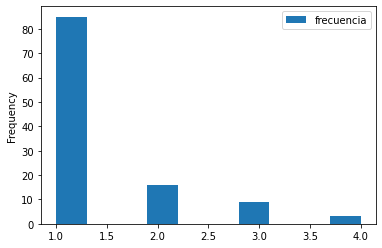

In [ ]:
#Creamos una gráfica que nos ayudará a interpretar los resultados.
corruption = df.groupby("Perceptions of corruption")
corruption_frec =  corruption.agg(frecuencia=("Perceptions of corruption", "count"))

corruption_frec.plot.hist()

In [ ]:
skewness = skew(df['Perceptions of corruption'])
print(skewness)

1.6344977355161203


👩🏽‍🦰👩🏽‍🦱💬  

*El sesgo es positivo, ya que la mayoría de los valores están concentrados a la izquierda y la cola queda a la derecha.*

-Intervalo de confianza de algunas de las variables numéricas del dataset


In [ ]:
import scipy.stats as st
# Queremos realizar el calculo de confianza para la media de la percepción de la corrupción
data = df['Perceptions of corruption']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de la percepción con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(0.09565069194585657, 0.12555443625927165)
0.11060256410256411


In [ ]:

data2 = df['GDP per capita']
#indica donde está la media de los valores del capital con un 80% de probabilidad.
print(st.t.interval(alpha=0.80, df=len(data2)-1, loc=np.mean(data2), scale=st.sem(data2)))

np.mean(data2)

0.9051474358974363

2- **Interpretación de los resultados.**

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

👩🏽‍🦰👩🏽‍🦱💬  

¡¡¡¡No nos acordamos!!!! 🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒

Las tablas de contingencia analizan la relación entre 2 variables cualitativas. En nuestro caso, tuvimos que crear una variable cualitativa, ya que sólo disponiamos de 1, que fue agrupar a los países alfabeticamente. Por lo tanto, esta relación es lineal porque una columna surge de la otra. Esto nos permite ordenar a los países en función de su nombre para poder trabajar mejor con ellos.

La matriz de correlación se usa con variables numéricas. Según hemos estudiado, cuanto más cerca del valor 1 esté el coeficiente, más relacionada están las variables. También concluimos que ningún resultado obtenido ha sido negativo, por lo que todas las correlaciones son positivas.



